In [1]:

import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
X_train = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter7_HTM737/refs/heads/main/X_train_clean.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter7_HTM737/refs/heads/main/X_test_clean.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter7_HTM737/refs/heads/main/y_train.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter7_HTM737/refs/heads/main/y_test.csv')

y_train = y_train.values.ravel()

In [3]:
model = LogisticRegression() # initialize the model
model.fit(X_train, y_train) # fit the model on the training data


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [4]:
y_pred = model.predict(X_test) # get predictions on the test set

In [5]:
# test the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy is {accuracy:.1%}')

accuracy is 86.8%


In [6]:
# we can see that even though the accuracy is high, the model is not performing well on the minority class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5378
           1       0.00      0.00      0.00       817

    accuracy                           0.87      6195
   macro avg       0.43      0.50      0.46      6195
weighted avg       0.75      0.87      0.81      6195



In [7]:
# we can also look at the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5375    3]
 [ 817    0]]


ROC AUC score is 0.724


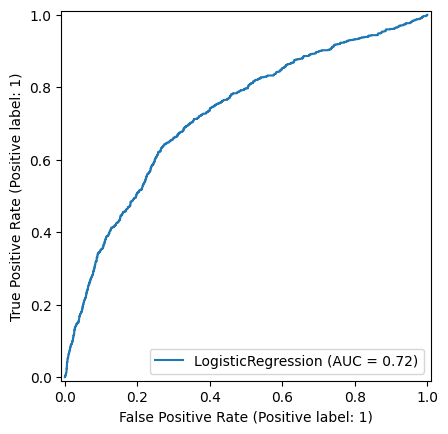

In [8]:
# compute ROC AUC score
# for binary classification, we need the predicted probabilities for the positive class
# get the predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC score is {roc_auc:.3f}')
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [9]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy is {accuracy:.1%}')

accuracy is 82.7%


In [11]:
# we can see that the precision and recall for the minority class is still low
# F1 score mean the harmonic mean of precision and recall
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# F1 = 2 * (precision * recall) / (precision + recall)
# it is a better measure than accuracy for imbalanced datasets
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.88      0.93      0.90      5378
     Class 1       0.25      0.15      0.19       817

    accuracy                           0.83      6195
   macro avg       0.56      0.54      0.55      6195
weighted avg       0.79      0.83      0.81      6195



In [12]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5003  375]
 [ 694  123]]


ROC AUC score is 0.650


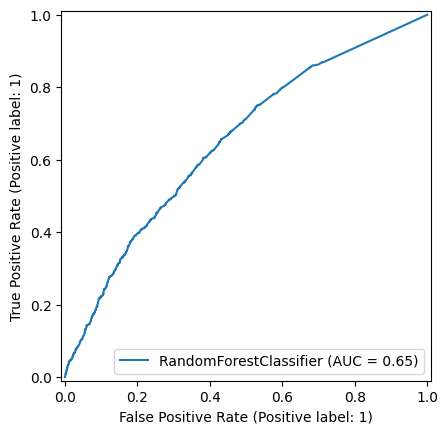

In [13]:
# ROC AUC score
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC score is {roc_auc:.3f}')
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [14]:
# SVM model
model = MLPClassifier()

model.fit(X_train, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy is {accuracy:.1%}')

accuracy is 86.4%


In [16]:
# f1 score
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.87      0.98      0.93      5378
     Class 1       0.40      0.07      0.12       817

    accuracy                           0.86      6195
   macro avg       0.64      0.53      0.52      6195
weighted avg       0.81      0.86      0.82      6195



In [17]:
# we can also look at the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5295   83]
 [ 761   56]]


ROC AUC score is 0.710


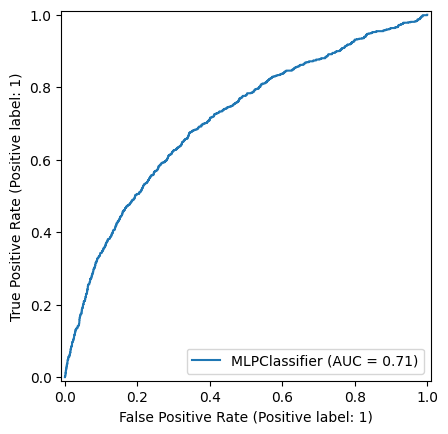

In [18]:
# ROC AUC score 
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC score is {roc_auc:.3f}')
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [19]:
model = SVC(probability=True) # probability=True enables predict_proba()

model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy is {accuracy:.1%}')

accuracy is 86.8%


In [21]:
#f1 score
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.87      1.00      0.93      5378
     Class 1       0.00      0.00      0.00       817

    accuracy                           0.87      6195
   macro avg       0.43      0.50      0.46      6195
weighted avg       0.75      0.87      0.81      6195



/Users/minhthienanvo/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/minhthienanvo/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/minhthienanvo/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

ROC AUC score is 0.404


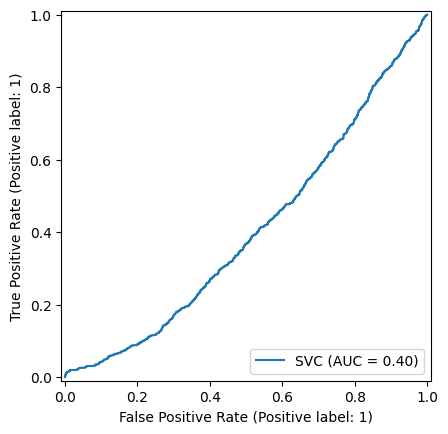

In [22]:
# ROC AUC score
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC score is {roc_auc:.3f}')
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [ ]:
#!pip install gradio -q

import gradio as gr
import pandas as pd

def predict(waittime, age, winter, night, sex):
    # Create input (adjust column order to match your X_train!)
    input_data = pd.DataFrame([[waittime, age, winter, night, sex]],
                               columns=['WAITTIME', 'AGE', 'WINTER', 'NIGHT', 'SEX'])

    # Predict
    pred = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1] * 100

    return f"Predicted Class: {int(pred)}\nProbability of Class 1: {prob:.2f}%"

# Create interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="WAITTIME"),
        gr.Number(label="AGE"),
        gr.Number(label="WINTER (0 or 1)", minimum=0, maximum=1),
        gr.Number(label="NIGHT (0 or 1)", minimum=0, maximum=1),
        gr.Number(label="SEX")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Healthcare Prediction Model",
    description="Enter patient features to predict outcome"
)

# Launch with public shareable link
interface.launch(share=True)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.5.1 which is incompatible.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.9.0 which is incompatible.
torchaudio 2.2.2 requires torch==2.2.2, but you have torch 2.2.0.post100 which is incompatible.
torchvision 0.17.2 requires torch==2.2.2, but you have torch 2.2.0.post100 which is incompatible.
transformers 4.24.0 requires huggingface-hub<1.0,>=0.10.0, but you have huggingface-hub 1.1.5 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://f81d40363de3880220.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio de